# Census Data Analysis for Income Classification

Team Members:


*   Harshit Agarwal: 2021A7PS0247H
*   Kaustubh Mahatme: 2021A7PS0312H
*   Sarthak Somani: 2021B1A70793H





# PreProcessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
                'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
                'hours-per-week', 'native-country','target']

df = pd.read_csv('adult.data', header=None,names=column_names)
df.to_csv('output_file.csv', index=False,)

# Handling NULL and Duplicate Values

In [ ]:
# Replace '?' with NaN values
df.replace(' ?', np.nan, inplace=True)

In [ ]:
#calculating % nan values
df.isnull().sum()*100/df.shape[0]

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.790486
target            0.000000
dtype: float64

In [ ]:
print(df.shape)

(32561, 15)


In [ ]:
#dropping null values as less than 6%
df.dropna(inplace=True)
print(df.shape)

(30162, 15)


In [ ]:
#dropping duplicates
df = df.drop_duplicates()
print(df.shape)

(30139, 15)


# Encoding of Categorial Features

In [ ]:
#ordinal encoding bcoz education attributes are in order
print(df['education'].unique())
education_order = [
    ' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th',
    ' 12th', ' HS-grad', ' Some-college', ' Assoc-acdm', ' Assoc-voc',
    ' Bachelors', ' Masters', ' Prof-school', ' Doctorate'
]

education_mapping = {level: index for index, level in enumerate(education_order)}
print(education_mapping)

df['education'] = df['education'].map(education_mapping)

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
{' Preschool': 0, ' 1st-4th': 1, ' 5th-6th': 2, ' 7th-8th': 3, ' 9th': 4, ' 10th': 5, ' 11th': 6, ' 12th': 7, ' HS-grad': 8, ' Some-college': 9, ' Assoc-acdm': 10, ' Assoc-voc': 11, ' Bachelors': 12, ' Masters': 13, ' Prof-school': 14, ' Doctorate': 15}


In [ ]:
#binarization
print(df['sex'].unique())
sex_mapping = {' Female': 0, ' Male': 1}
print(sex_mapping)
df['sex'] = df['sex'].map(sex_mapping)

[' Male' ' Female']
{' Female': 0, ' Male': 1}


In [ ]:
#label encoding (0,1)
print(df['target'].unique())
target_mapping = {' <=50K': 0, ' >50K': 1}
print(target_mapping)

df['target'] = df['target'].map(target_mapping)

[' <=50K' ' >50K']
{' <=50K': 0, ' >50K': 1}


In [ ]:
#one hot-encoding bcoz all are independent, and have equal weightage
print(df['race'].unique())
# Perform one-hot encoding for the 'race' column
df = pd.get_dummies(df, columns=['race'], drop_first=False)

[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']


In [ ]:
#calculating the frequency
frequency = df['native-country'].value_counts()
print(frequency)

native-country
 United-States                 27487
 Mexico                          606
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        61
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                

In [ ]:
#count encoding
print(df['native-country'].unique())
count_encoding = df['native-country'].value_counts()

# Map each value to its corresponding count
df['native-country'] = df['native-country'].map(count_encoding)

[' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras' ' England' ' Canada' ' Germany' ' Iran' ' Philippines'
 ' Poland' ' Columbia' ' Cambodia' ' Thailand' ' Ecuador' ' Laos'
 ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic' ' El-Salvador'
 ' France' ' Guatemala' ' Italy' ' China' ' South' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']


In [ ]:
#ordinal encoding
print(df['marital-status'].unique())
marital_status_order = [
    ' Never-married', ' Separated', ' Divorced', ' Widowed',
    ' Married-spouse-absent', ' Married-civ-spouse', ' Married-AF-spouse'
]

# Create a dictionary mapping each marital status to its ordinal value
ordinal_encoding = {status: index for index, status in enumerate(marital_status_order)}

# Perform ordinal encoding on the 'marital-status' column
df['marital-status'] = df['marital-status'].map(ordinal_encoding)

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


In [ ]:
#count encoding
print(df['occupation'].unique())
count_encoding = df['occupation'].value_counts()

# Map each occupation to its corresponding count
df['occupation'] = df['occupation'].map(count_encoding)

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']


In [ ]:
#one hot encoding
relationship_status_order = [
    ' Not-in-family', ' Husband', ' Not-in-family', ' Husband', ' Wife'
]
unique_relationship = df['relationship'].unique()

# Perform one-hot encoding for the 'race' column
df = pd.get_dummies(df, columns=['relationship'], drop_first=False)

In [ ]:
#calculate frequency
frequency = df['workclass'].value_counts()
print(frequency)

workclass
 Private             22264
 Self-emp-not-inc     2498
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: count, dtype: int64


In [ ]:
#count encoding
print(df['workclass'].unique())
count_encoding = df['workclass'].value_counts()

# Map each value to its corresponding count
df['workclass'] = df['workclass'].map(count_encoding)

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']


In [ ]:
#Shift the target column to the end
# Pop the 'target' column
target = df.pop('target')

# Insert the 'target' column at the end
df['target'] = target

In [ ]:
# Print the names of all columns
print("Column names:")
print(df.columns.tolist())

Column names:
['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'race_ Amer-Indian-Eskimo', 'race_ Asian-Pac-Islander', 'race_ Black', 'race_ Other', 'race_ White', 'relationship_ Husband', 'relationship_ Not-in-family', 'relationship_ Other-relative', 'relationship_ Own-child', 'relationship_ Unmarried', 'relationship_ Wife', 'target']


In [ ]:
frequency = df['target'].value_counts()
print(frequency)

target
0    22633
1     7506
Name: count, dtype: int64


# Normalization

In [ ]:
# Min-max Normalization bcoz we have done one-hot-encoding for the attributes so to maintain 0-1.
from sklearn.preprocessing import MinMaxScaler
print(df)
X = df.drop(columns=['target'])

# Extract target variable (y)
y = df['target']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
X = scaler.fit_transform(X)

print("Normalized Data:")
print(X)


       age  workclass  fnlwgt  education  education-num  marital-status  \
0       39       1279   77516         12             13               0   
1       50       2498   83311         12             13               5   
2       38      22264  215646          8              9               2   
3       53      22264  234721          6              7               5   
4       28      22264  338409         12             13               5   
...    ...        ...     ...        ...            ...             ...   
32556   27      22264  257302         10             12               5   
32557   40      22264  154374          8              9               5   
32558   58      22264  151910          8              9               3   
32559   22      22264  201490          8              9               0   
32560   52       1074  287927          8              9               5   

       occupation  sex  capital-gain  capital-loss  ...  race_ Black  \
0            3719    1     

In [ ]:
print(df.shape)

(30139, 24)


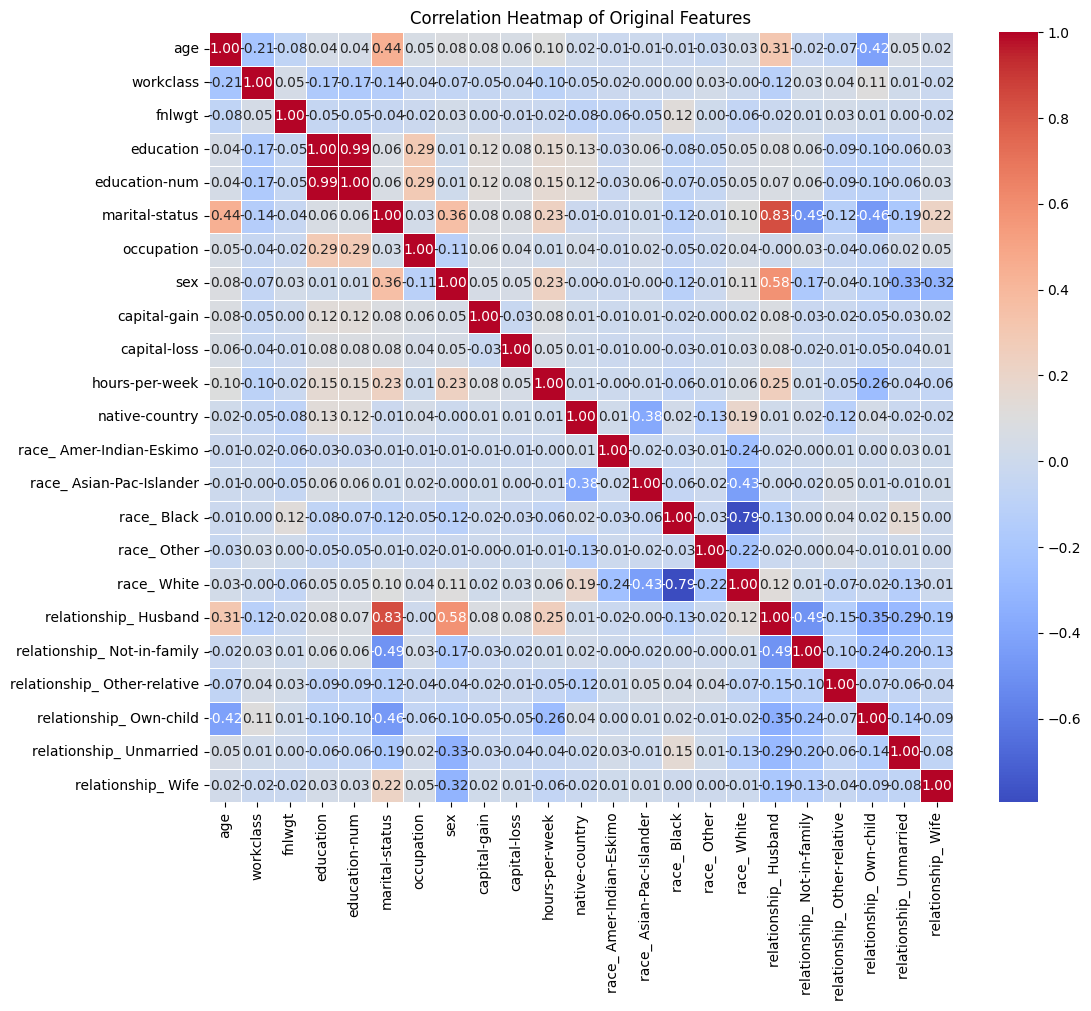

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the correlation matrix of the original features
original_corr = df.drop('target', axis=1).corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(original_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Original Features')
plt.show()

plt.savefig('heatmap.png')

# PCA

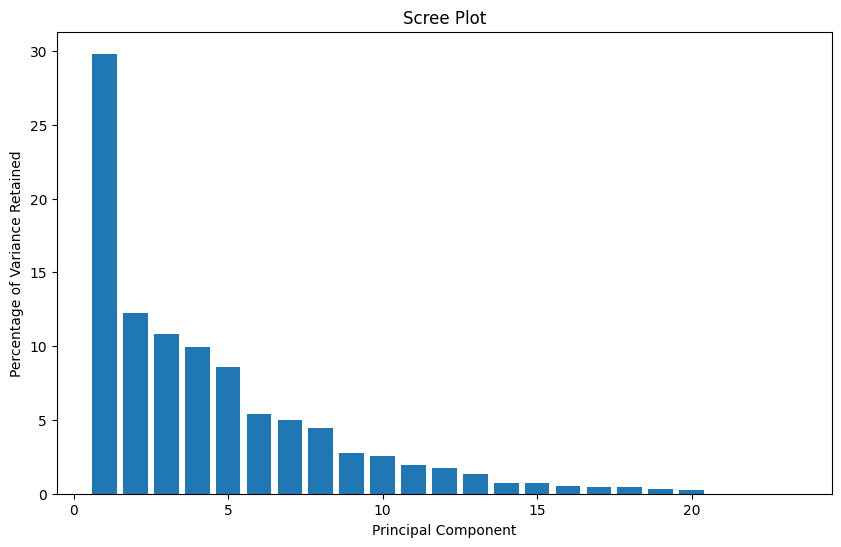

Percentage of variance retained per principal component:
PC1: 29.81%
PC2: 12.24%
PC3: 10.82%
PC4: 9.91%
PC5: 8.56%
PC6: 5.41%
PC7: 4.97%
PC8: 4.47%
PC9: 2.77%
PC10: 2.54%
PC11: 1.92%
PC12: 1.74%
PC13: 1.33%
PC14: 0.73%
PC15: 0.71%
PC16: 0.53%
PC17: 0.48%
PC18: 0.46%
PC19: 0.30%
PC20: 0.28%
PC21: 0.01%
PC22: 0.00%
PC23: 0.00%


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA
pca = PCA()
pca.fit(X)

# Calculate the percentage of variance retained for each principal component
percentage_variance_retained = pca.explained_variance_ratio_ * 100

# Scree plot (bar plot)
plt.figure(figsize=(10, 6))
plt.bar(range(1, 24), percentage_variance_retained, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Variance Retained')
plt.title('Scree Plot')
plt.show()

plt.savefig('screeplot.png')

# Print percentage of variance retained per principal component
print('Percentage of variance retained per principal component:')
for i, variance_retained in enumerate(percentage_variance_retained):
    print(f'PC{i+1}: {variance_retained:.2f}%')

In [ ]:
desired_variance_percentage=90
# Calculate cumulative explained variance ratios
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_) * 100

# Find the number of principal components needed to explain the desired percentage of variance
num_components_needed = np.argmax(cumulative_variance_ratio >= desired_variance_percentage) + 1

print(f'Number of principal components needed to explain {desired_variance_percentage}% of variance:', num_components_needed)

Number of principal components needed to explain 90% of variance: 10


In [ ]:
X = pca.transform(X)[:, :num_components_needed]

print("Shape of X:", X.shape)

Shape of X: (30139, 10)


In [ ]:
# Concatenate principal components with the target variable
df = pd.DataFrame(np.concatenate((X, y.values.reshape(-1, 1)), axis=1),
                  columns=[f'PC{i}' for i in range(X.shape[1])]+['target'])

# Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df

PC0       PC1       PC2       PC3       PC4       PC5       PC6  \
0      0.434624 -0.923460  0.311317  0.110267  0.678710  0.124534 -0.073114   
1     -0.901995 -0.106599  0.319610 -0.240307  0.462787 -0.094330 -0.093345   
2      0.388889 -0.765791 -0.175159  0.340112 -0.184693  0.245997  0.053174   
3     -0.658079  0.663734  0.315871  1.094754 -0.263954 -0.080631 -0.225807   
4      0.493347  1.068063  0.795576  0.447129 -0.484057 -0.753870  0.556883   
...         ...       ...       ...       ...       ...       ...       ...   
30134  0.327856  0.376835  0.125068 -0.609458 -0.432409 -0.329702  0.263549   
30135 -0.808365  0.004055 -0.216141  0.024090 -0.285740  0.071985 -0.010266   
30136  0.538768  0.527310  0.246064 -0.649269 -0.437492  0.565257 -0.181614   
30137  0.402955  0.168718 -1.017305  0.080192  0.415336 -0.057489 -0.105012   
30138  0.212928  0.283436  0.701445 -0.875149  0.301641 -0.426906  0.255466   

            PC7       PC8       PC9  target  
0      0.197248  0.131290  0.054026     0.0  
1      0.155958 -0.046137  0.005578     0.0  
2     -0.366401  0.161415  0.134679     0.0  
3     -0.559281 -0.066180 -0.063605     0.0  
4      0.209476  0.694680  0.085801     0.0  
...         ...       ...       ...     ...  
30134 -0.674489  0.707630  0.462513     0.0  
30135 -0.289888 -0.069267  0.076587     1.0  
30136  0.128152 -0.054345 -0.079898     0.0  
30137  0.185498  0.121141 -0.143696     0.0  
30138 -0.277757  0.711429 -0.221496     1.0  

[30139 rows x 11 columns]

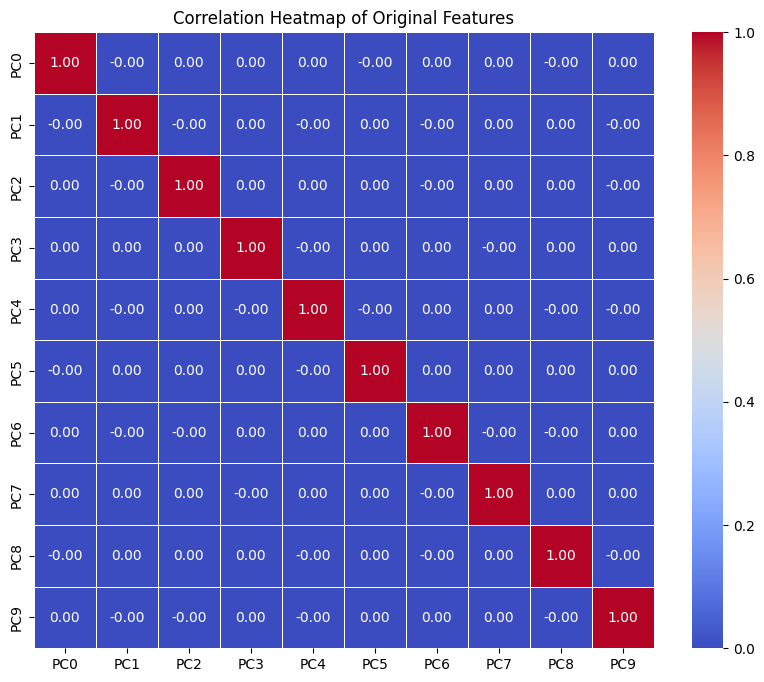

In [ ]:
import seaborn as sns

# Calculate the correlation matrix of the original features
original_corr = df.drop('target', axis=1).corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(original_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Original Features')
plt.show()
plt.savefig('heatmap2.png')

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

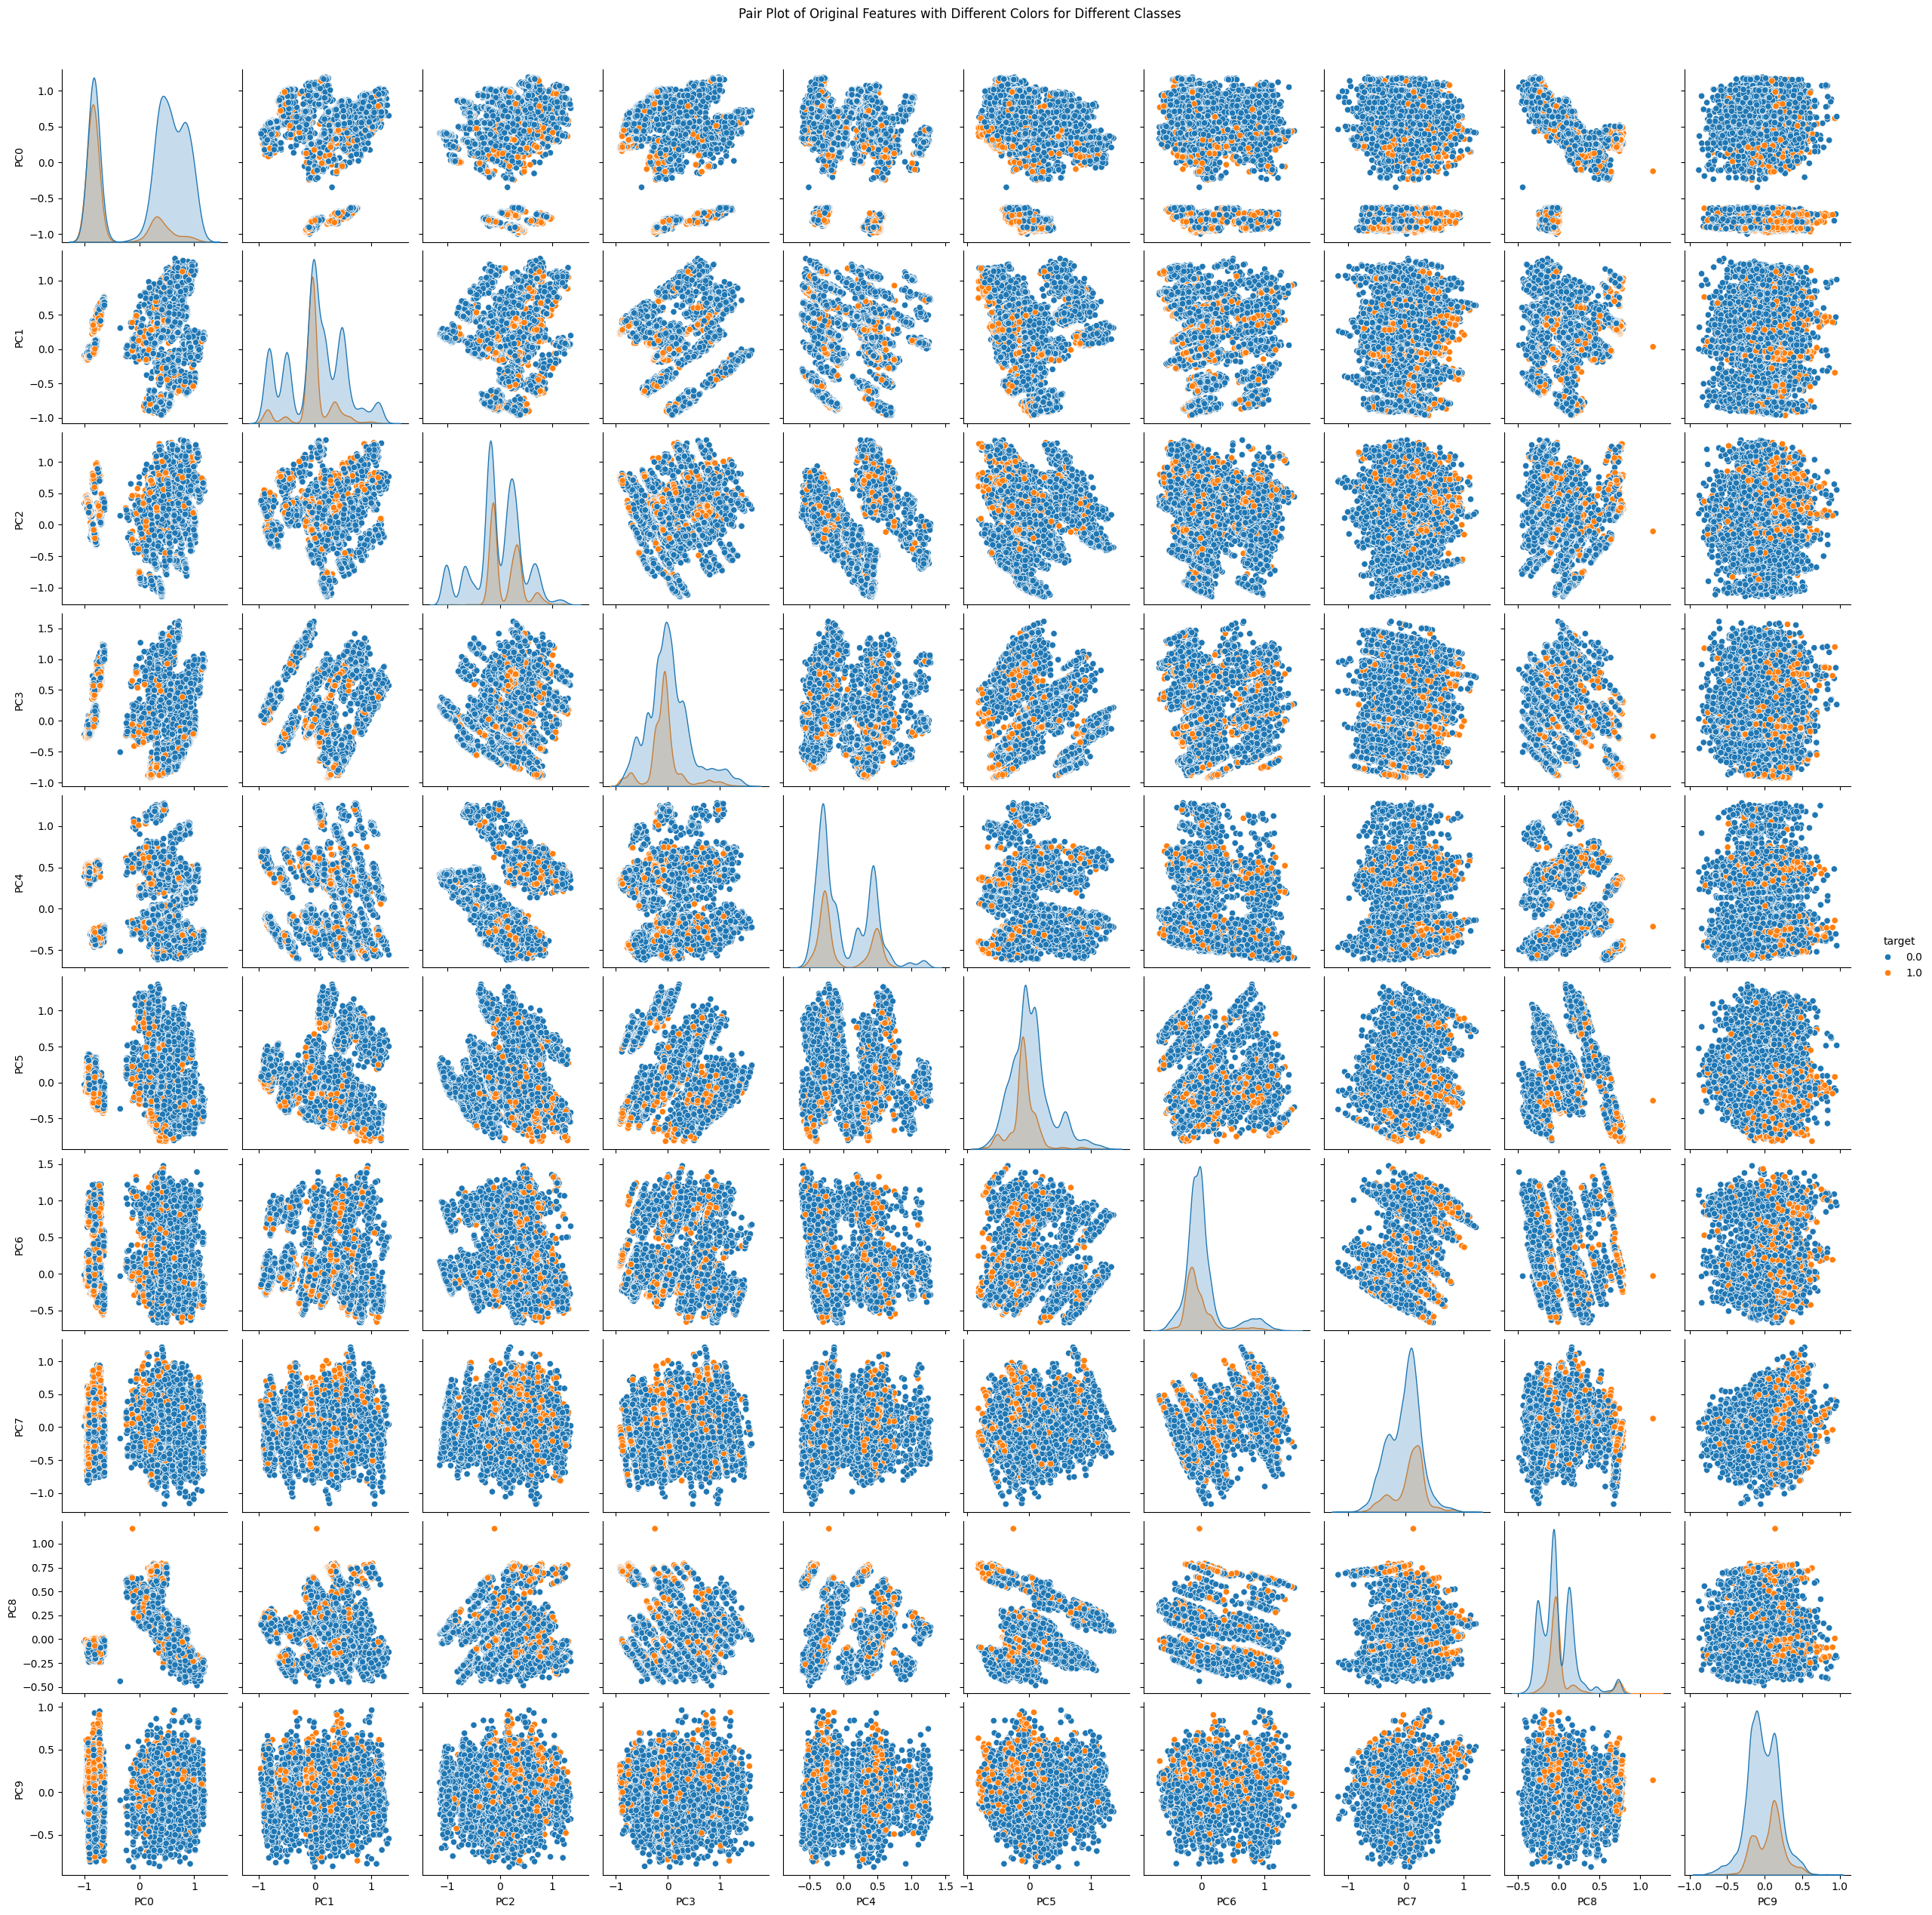

In [ ]:
import seaborn as sns

# Pair plot of the original features with different colors for different classes
sns.pairplot(df, hue='target')
plt.suptitle('Pair Plot of Original Features with Different Colors for Different Classes', y=1.02)
plt.show()
plt.savefig('pairplot.png')

# SVM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],                        #represents the regularization parameter in Support Vector Machines (SVMs). It controls the trade-off between achieving a low training error and minimizing the norm of the weights.
    'gamma': [0.001, 0.01, 0.1, 1],           #The gamma parameter can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Create the SVM classifier
svm = SVC(probability=True)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svm, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Get the best SVM model
best_svm = grid_search.best_estimator_

Best hyperparameters: {'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}


In [ ]:
import matplotlib.pyplot as plt
# Get training accuracy
train_accuracy = best_svm.score(X_train_scaled, y_train)
print("Training Accuracy:", train_accuracy)

# Evaluate the model on the test set
test_accuracy = best_svm.score(X_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.8166397080170876
Test Accuracy: 0.8128732581287326


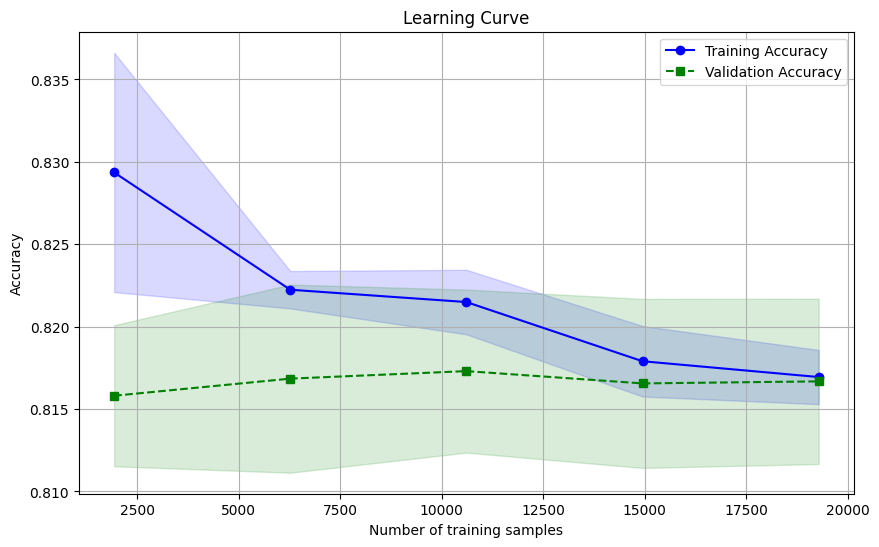

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(best_svm, X_train_scaled, y_train, cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.title('Learning Curve')
plt.show()
plt.savefig('lcsvm.png')


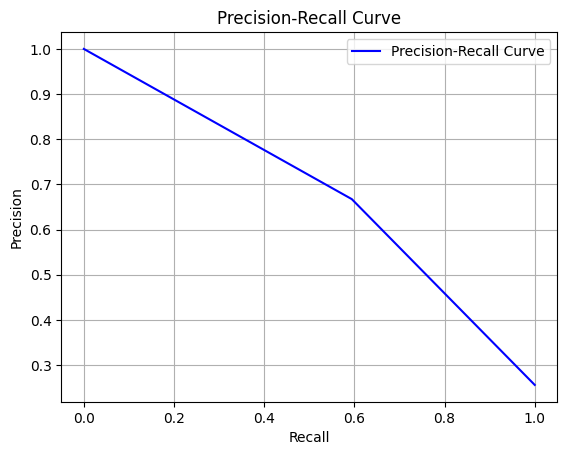

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
y_pred = best_svm.predict(X_test_scaled)

# Compute precision-recall pairs
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('prsvm.png')




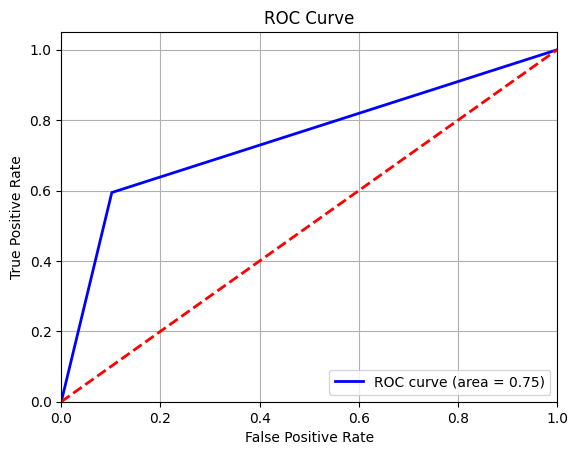

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute false positive rate and true positive rate
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Compute ROC AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
plt.savefig('rocsvm.png')



In [ ]:
from sklearn.metrics import classification_report


print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88      4485
         1.0       0.71      0.45      0.55      1543

    accuracy                           0.81      6028
   macro avg       0.77      0.69      0.72      6028
weighted avg       0.80      0.81      0.80      6028



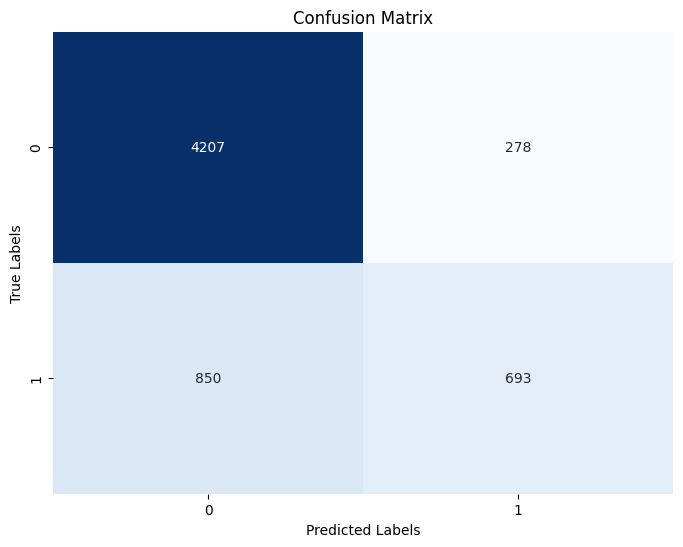

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
plt.savefig('cmsvm.png')

# ANN

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the ANN classifier
ann_clf = MLPClassifier(max_iter=1000)  # You can customize other parameters here

# Define the hyperparameters to tune
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['logistic', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
}
# Perform grid search to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=ann_clf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create the best MLPClassifier model using the best hyperparameters
best_ann_clf = MLPClassifier(max_iter=1000, **best_params)

# Train the model with the best hyperparameters
best_ann_clf = MLPClassifier(max_iter=1000, **best_params)  # Set the maximum number of iterations
# best_ann_clf.fit(X_train_scaled, y_train)

In [ ]:
# Fit the best ANN classifier
best_ann_clf.fit(X_train_scaled, y_train)

# Get training accuracy
train_accuracy = best_ann_clf.score(X_train_scaled, y_train)
print("Training Accuracy:", train_accuracy)

# Evaluate the model on the test set
test_accuracy = best_ann_clf.score(X_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.8180083779187922
Test Accuracy: 0.8120437956204379


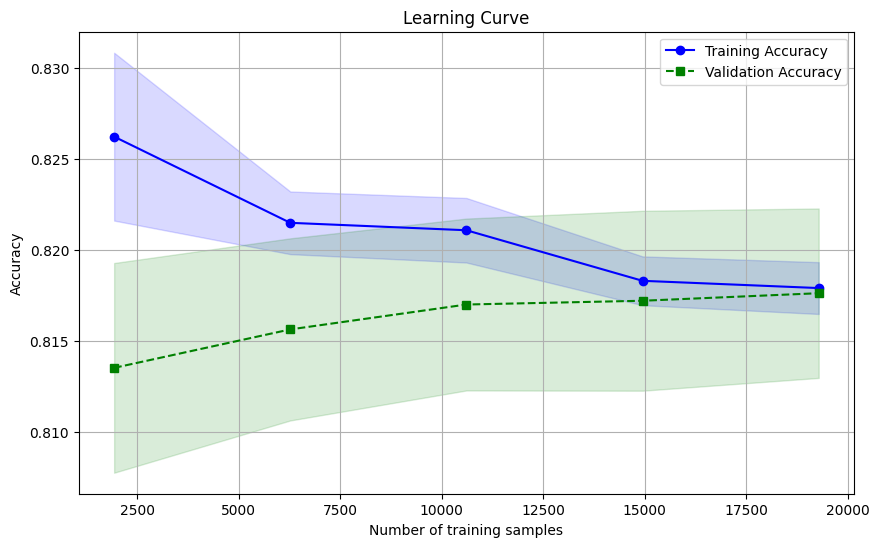

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(best_ann_clf, X_train_scaled, y_train, cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.title('Learning Curve')
plt.show()
plt.savefig('lcann.png')

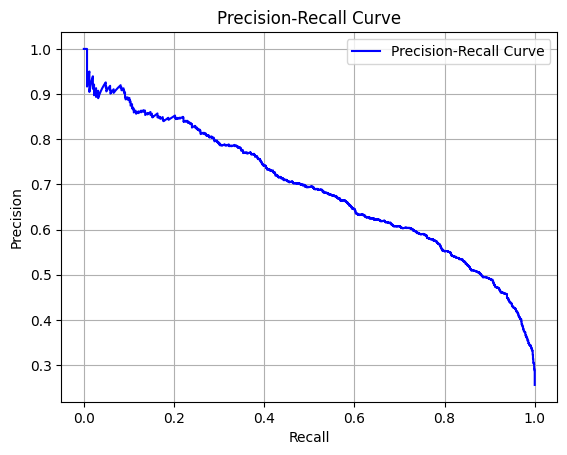

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Compute precision-recall pairs
precision, recall, _ = precision_recall_curve(y_test, best_ann_clf.predict_proba(X_test_scaled)[:, 1])

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('prann.png')


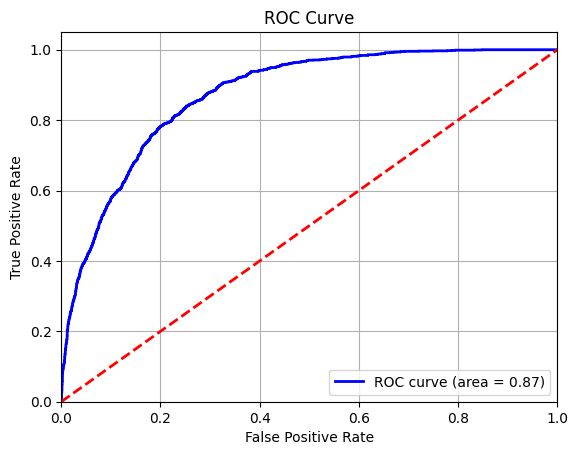

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute false positive rate and true positive rate
fpr, tpr, _ = roc_curve(y_test, best_ann_clf.predict_proba(X_test_scaled)[:, 1])

# Compute ROC AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
plt.savefig('rocann.png')

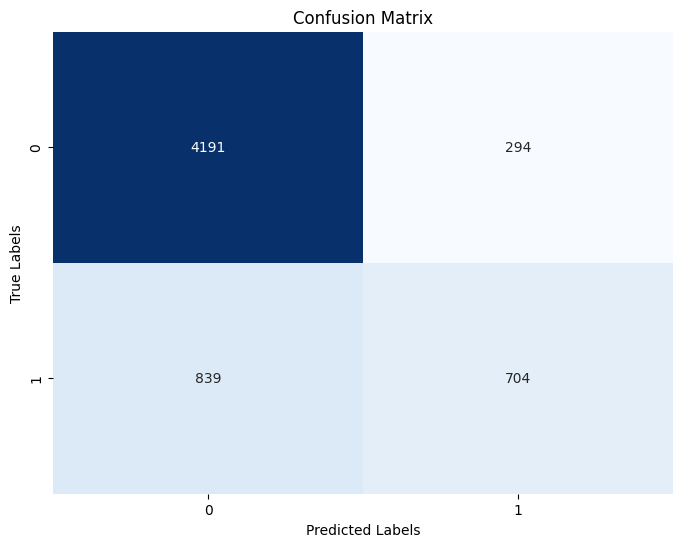


Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.93      0.88      4485
         1.0       0.71      0.46      0.55      1543

    accuracy                           0.81      6028
   macro avg       0.77      0.70      0.72      6028
weighted avg       0.80      0.81      0.80      6028



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

y_pred = best_ann_clf.predict(X_test_scaled)
# Compute confusion matrix
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
plt.savefig('cmann.png')
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# GBDT

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the gradient boosted classifier
gb_clf = GradientBoostingClassifier()

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5]
}

# Perform grid search to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_gb_clf = GradientBoostingClassifier(**best_params)
# best_gb_clf.fit(X_train_scaled, y_train)

In [ ]:
best_gb_clf.fit(X_train_scaled, y_train)

# Get training accuracy
train_accuracy = accuracy_score(y_train, best_gb_clf.predict(X_train_scaled))
print("Training Accuracy:", train_accuracy)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, best_gb_clf.predict(X_test_scaled))
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.8561237609389905
Test Accuracy: 0.8309555408095554


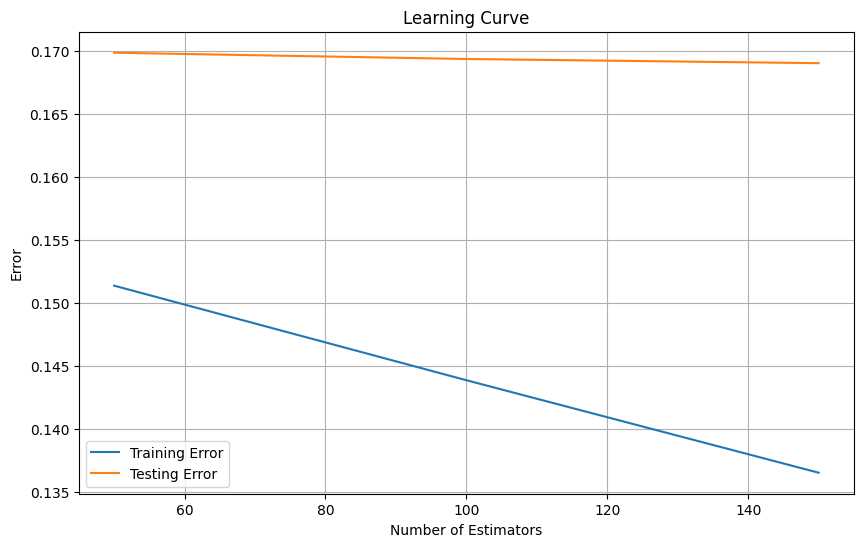

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

train_errors = []
test_errors = []

estimators = [50, 100, 150]  # Assuming you want to plot for these values
for estimator in estimators:
    gb_clf = GradientBoostingClassifier(n_estimators=estimator, **{key: value for key, value in best_params.items() if key != 'n_estimators'})
    gb_clf.fit(X_train_scaled, y_train)
    train_errors.append(1 - gb_clf.score(X_train_scaled, y_train))
    test_errors.append(1 - gb_clf.score(X_test_scaled, y_test))

plt.figure(figsize=(10, 6))
plt.plot(estimators, train_errors, label='Training Error')
plt.plot(estimators, test_errors, label='Testing Error')
plt.xlabel('Number of Estimators')
plt.ylabel('Error')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('lcdt.png')

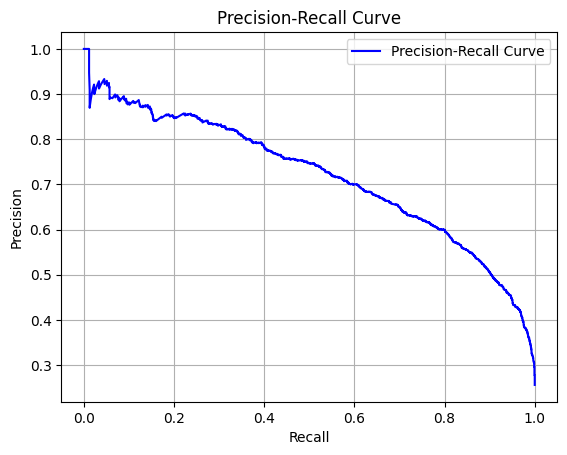

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Compute precision-recall pairs
precision, recall, _ = precision_recall_curve(y_test, best_gb_clf.predict_proba(X_test_scaled)[:, 1])

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('prgbdt.png')



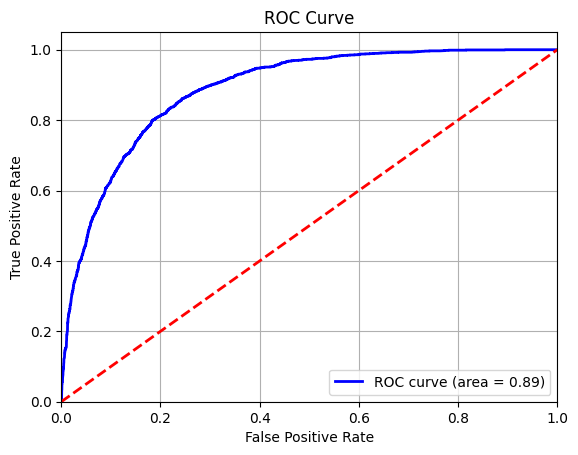

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute false positive rate and true positive rate
fpr, tpr, _ = roc_curve(y_test, best_gb_clf.predict_proba(X_test_scaled)[:, 1])

# Compute ROC AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
plt.savefig('rocgbdt.png')

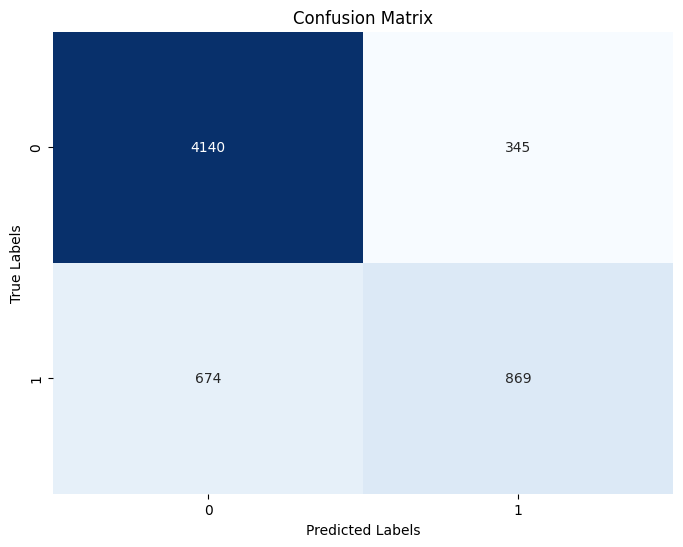


Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89      4485
         1.0       0.72      0.56      0.63      1543

    accuracy                           0.83      6028
   macro avg       0.79      0.74      0.76      6028
weighted avg       0.82      0.83      0.82      6028



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt


# Assuming best_gb_clf is your trained GradientBoostingClassifier
# Make sure you have already defined and trained it
y_pred = best_gb_clf.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
plt.savefig('cmgbdt.png')
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



# NB

var_smoothing is a smoothing parameter added to the variances for calculation stability. Smoothing is necessary because if a feature in the test set has a value not present in the training set, then the model assigns it zero probability and, therefore, cannot make predictions. To prevent this, a small value is added to the variance to smooth the calculation.

This parameter determines the number of folds in cross-validation. In this case, cv=3 means that the data will be split into 3 folds

This parameter controls the verbosity of the output during the fitting process. When verbose=1

Setting verbose=0 will suppress these progress messages, while setting verbose>1 may increase the level of detail in the output.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Naive Bayes classifier
nb_clf = GaussianNB()

# Define the hyperparameters to tune (Note: Naive Bayes doesn't have many hyperparameters to tune)
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]  # Smoothing parameter
}


# Perform grid search to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=nb_clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_nb_clf = GaussianNB(**best_params)
best_nb_clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = best_nb_clf.predict(X_test_scaled)

In [ ]:
# Get training accuracy
train_accuracy = best_nb_clf.score(X_train_scaled, y_train)
print("Training Accuracy:", train_accuracy)

# Evaluate the model on the test set
test_accuracy = best_nb_clf.score(X_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.7535979428476629
Test Accuracy: 0.7574651625746516


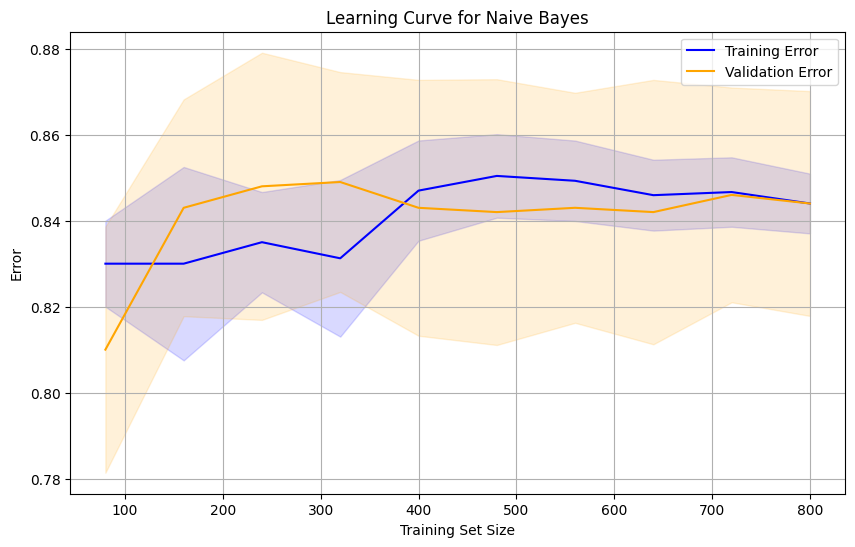

In [ ]:
# Define the training set sizes
import matplotlib.pyplot as plt
train_sizes = np.linspace(0.1, 1.0, 10)  # 10 different training set sizes from 10% to 100%

# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(
    nb_clf, X, y, train_sizes=train_sizes, cv=5)

# Compute mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Error', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, label='Validation Error', color='orange')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='orange')
plt.xlabel('Training Set Size')
plt.ylabel('Error')
plt.title('Learning Curve for Naive Bayes')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('lcnb.png')

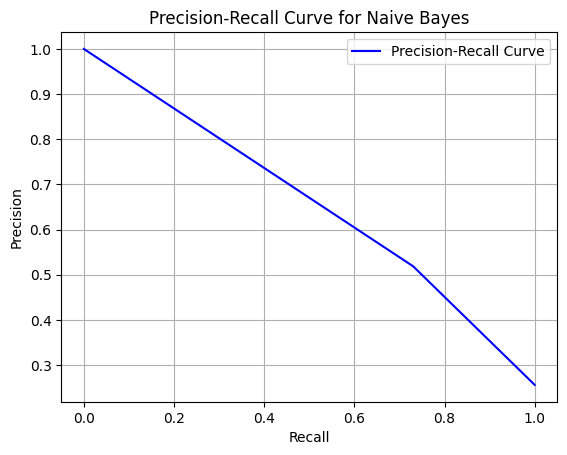

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve


# Compute precision-recall pairs
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Naive Bayes')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('prnb.png')

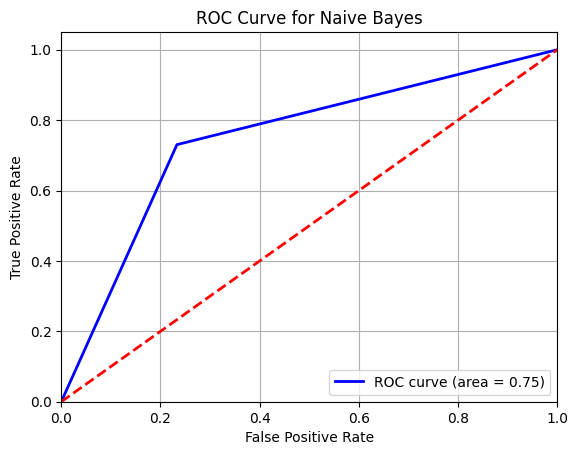

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc



# Compute false positive rate and true positive rate
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Compute ROC AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
plt.savefig('rocnb.png')

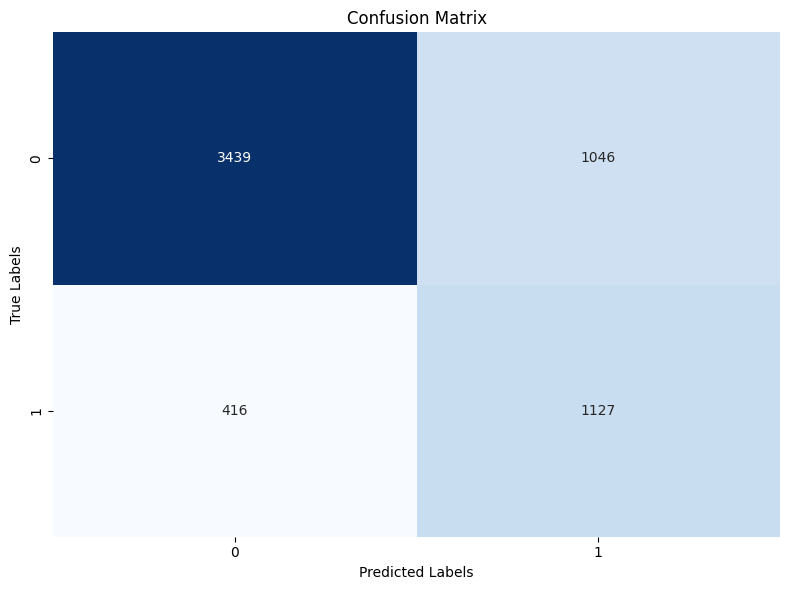


Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.77      0.82      4485
         1.0       0.52      0.73      0.61      1543

    accuracy                           0.76      6028
   macro avg       0.71      0.75      0.72      6028
weighted avg       0.80      0.76      0.77      6028



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()

# Save the plot as an image file
plt.savefig('confusion_matrix.png')

# Show the plot
plt.show()
plt.savefig('cmnb.png')
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Multimodel

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Get the best estimators from each grid search
# best_svm_clf = svm_grid_search.best_estimator_
# best_gbdt_clf = gbdt_grid_search.best_estimator_
# best_nb_clf = nb_grid_search.best_estimator_
# best_ann_clf = ann_grid_search.best_estimator_

# Fit the best classifiers on the full training data
best_svm.fit(X_train_scaled, y_train)
best_gb_clf.fit(X_train_scaled, y_train)
best_nb_clf.fit(X_train_scaled, y_train)
best_ann_clf.fit(X_train_scaled, y_train)

# Predict probabilities on the test set
svm_proba = best_svm.predict_proba(X_test_scaled)[:, 1]
gbdt_proba = best_gb_clf.predict_proba(X_test_scaled)[:, 1]
nb_proba = best_nb_clf.predict_proba(X_test_scaled)[:, 1]
ann_proba = best_ann_clf.predict_proba(X_test_scaled)[:, 1]

# Concatenate the probabilities
all_proba = np.column_stack((svm_proba, gbdt_proba, nb_proba, ann_proba))

# Define a logistic regression meta-learner
meta_learner = LogisticRegression()

# Fit the meta-learner on the probabilities
meta_learner.fit(all_proba, y_test)

# Make predictions on the probabilities
weighted_proba = meta_learner.predict_proba(all_proba)[:, 1]

# Convert probabilities to binary predictions
weighted_pred = np.where(weighted_proba >= 0.5, 1, 0)

# Evaluate the weighted ensemble model
accuracy = accuracy_score(y_test, weighted_pred)
print("Weighted Ensemble Model Accuracy:",accuracy)

Weighted Ensemble Model Accuracy: 0.829628400796284


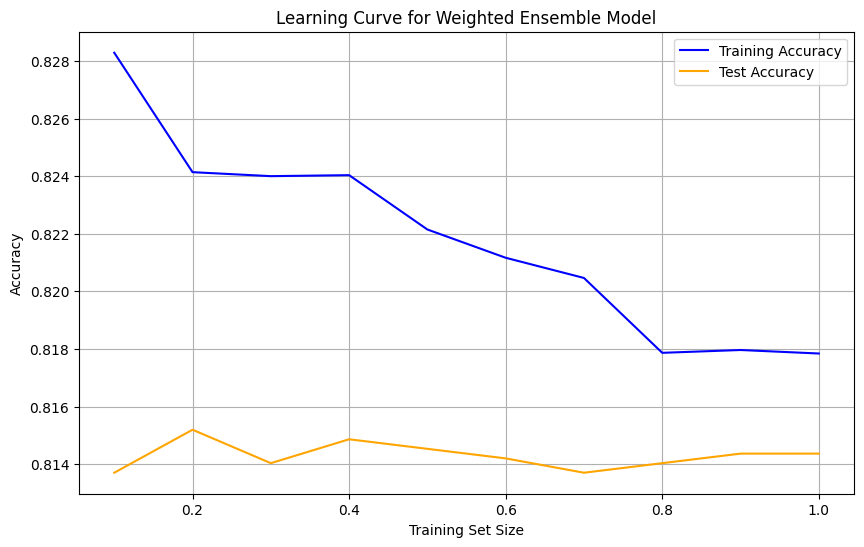

In [ ]:
# Define the training set sizes
import matplotlib.pyplot as plt
train_sizes = np.linspace(0.1, 1.0, 10)  # 10 different training set sizes from 10% to 100%

# Initialize empty arrays to store cross-validated accuracy scores
train_scores = []
test_scores = []

# Perform manual cross-validation and calculate accuracy scores for each training set size
for train_size in train_sizes:
    # Determine the number of samples for the current training size
    n_train_samples = int(train_size * X_train.shape[0])
    X_train_subset = X_train[:n_train_samples]
    y_train_subset = y_train[:n_train_samples]

    # Fit the meta-learner on the subset of the training data
    meta_learner.fit(X_train_subset, y_train_subset)

    # Predict probabilities on the subset of the training data
    weighted_proba_subset = meta_learner.predict_proba(X_train_subset)[:, 1]

    # Convert probabilities to binary predictions
    weighted_pred_subset = np.where(weighted_proba_subset >= 0.5, 1, 0)

    # Calculate accuracy scores
    train_accuracy = accuracy_score(y_train_subset, weighted_pred_subset)
    test_accuracy = accuracy_score(y_test, meta_learner.predict(X_test))

    # Append accuracy scores to the lists
    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, label='Training Accuracy', color='blue')
plt.plot(train_sizes, test_scores, label='Test Accuracy', color='orange')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Weighted Ensemble Model')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('lcmm.png')

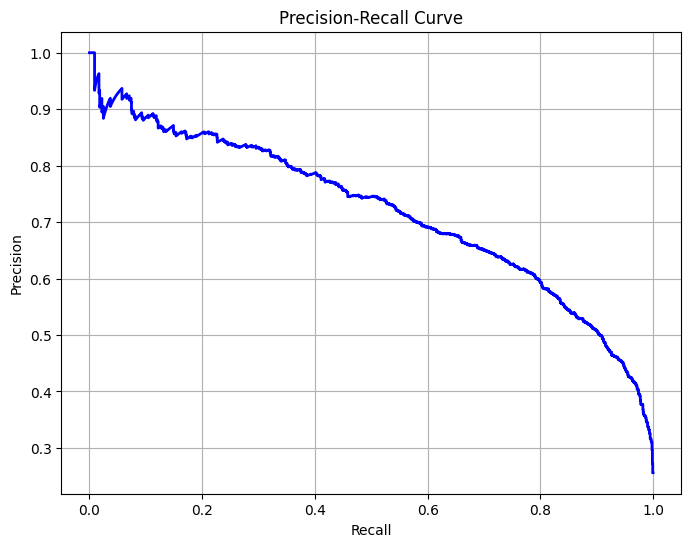

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Compute precision and recall
precision, recall, _ = precision_recall_curve(y_test, weighted_proba)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()
plt.savefig('prmm.png')

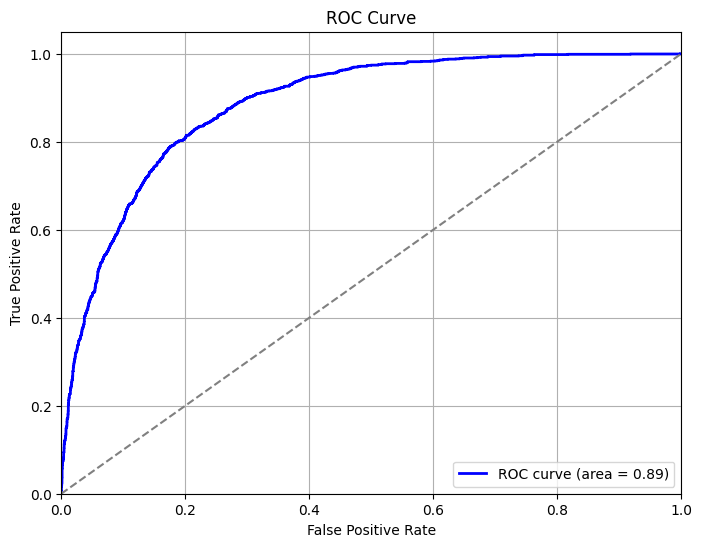

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, weighted_proba)

# Compute area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
plt.savefig('rocmm.png')

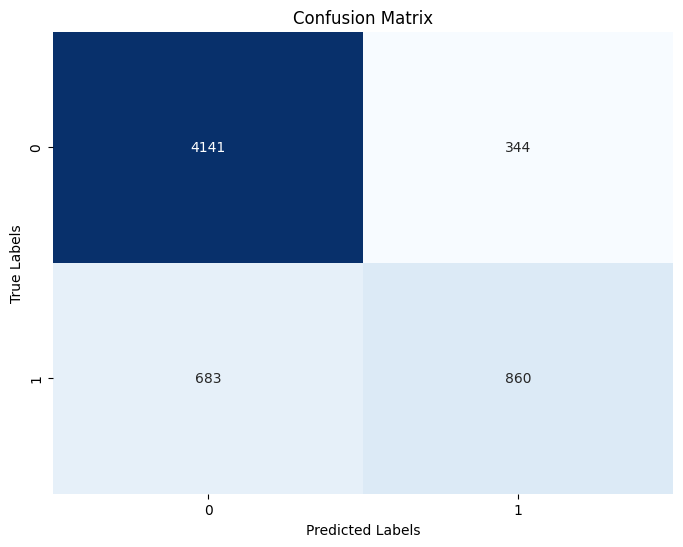


Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89      4485
         1.0       0.71      0.56      0.63      1543

    accuracy                           0.83      6028
   macro avg       0.79      0.74      0.76      6028
weighted avg       0.82      0.83      0.82      6028



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
# Make predictions
weighted_pred = np.where(weighted_proba >= 0.5, 1, 0)
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, weighted_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
plt.savefig('cmmm.png')
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, weighted_pred))
